# Testing for Normality 
**"In applied statistics the question is not whether the data/residuals … are perfectly normal, but normal enough for the assumptions to hold."** Cross Validated Forum

Parametric models operate under the assumption that your data is has some specific distribution. If you use a parametric test on a non-parametric dataset, you may end up with unreliable or incorrect results. 
![paranormal](./paranormal.jpg)

We can use a combination of both visualizations and statistical tests to measure the distribution of our dataset, and the results of our test will help us decide on the proper model to use. 

Let's first generate a set of random numbers using numpy: 

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# generate gaussian data
from numpy.random import seed # set seed for reproducible results
from numpy.random import randn # import the random number pacakge
from numpy import mean # function to calc mean
from numpy import std # function to calc standard deviation

# seed the random number generator
seed(1)
# generate 100 random gaussian observations
data = pd.DataFrame({"nums":5 * randn(100) + 50})
print(data.head())

# summarize mean and std
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

        nums
0  58.121727
1  46.941218
2  47.359141
3  44.635157
4  54.327038
mean=50.303 stdv=4.426


## Visualization
As we've seen in previous lectures, it's easy to plot the distribution of our datasets using pandas as a quick check for normality: 

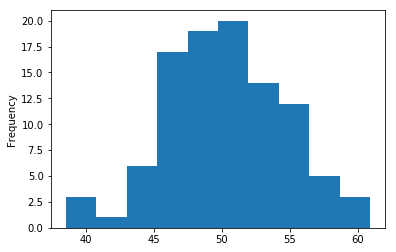

In [30]:
data.nums.plot(kind='hist') 

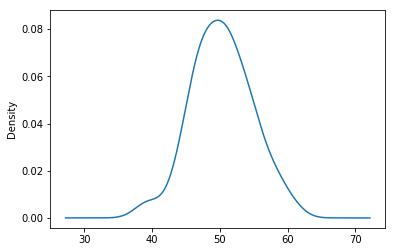

In [31]:
data.nums.plot(kind='density')

### Box Plots

Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group.

![boxplot](./boxplot.png)

In the boxplot above we can see that: 
- Boxplot 1 is right skewed with outliers in the higher range of the y axis
- The range of values in Boxplot 2 is smaller than other, but the values are higher
- Boxplot 3 appears to have a fairly normal distribution
- Boxplot 4 has a smaller range, but also appears to be normally distributed

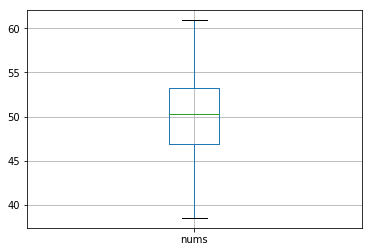

In [62]:
data.boxplot()

### QQ Plots
A quantile-quantile (QQ) plot determines if two different data sets — the one you are testing and a normally distributed dataset — come from a population with a similar distribution. 

Quantiles repsent the percentage of the dataset that fall below a certain threshold. The median, for example, is a quantile where 50% of the dasaset falls below, and 50% above. The Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. 

We'll use scipy's stats package to create a [QQ plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) comparing our dataset above with the normal distribution: 

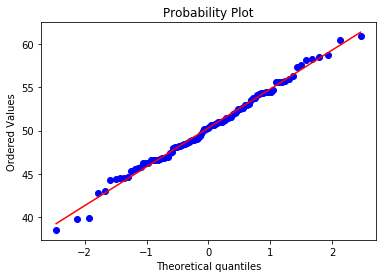

In [33]:
import scipy.stats as stats

stats.probplot(data.nums, dist="norm", plot=plt)
plt.show()

A perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0, as shown in red. Our dataset is plotted in blue. If the plot appears to be roughly in agreement with the straight line, then the underlying distribution can be assumed to be normal. 

The X axis represents the quantiles from the theoretical distribution (normal), and the Y axis respresents the quantiles from our dataset. The values shown on the X axis ticks are standard deviations from the mean. 

## Statistical Normality Tests
There are several tests that you can use to statistically comparae the difference between your distritubtion and a theoretical distribution, such as normal. We'll look at two of the most common tests and how and when to use each one. 

Each different test looks at slightly different aspects of the dataset to determine the distribution, but they all return the same basic metrics: 

- Test Statistic: A quantity calculated by the test that can be used to assess if your results allow you to reject your null hypothesis (aka, would we likely see this by chance?)
- P-value: Meausres how likely we woud be to see this data if the null hypothesis were true. Gives us a measure of confidence in the results. 
    - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    - A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
    
#### Interpreting Test Results
Understanding the invidual test statistics can give us deeper insights into the dataset, but it also requires a deeper understanding of the underlying statistical methods used. Unless you have a particular reason to dig deeper into the stats, the pvalue of the test is often all we need to determine whether to accept or reject our null hypothesis. 

**Remember: Our null hypothesis here is that the data our sample is the distribution is identical to the other distribution we’re testing it against.** If p < .05 we can reject the null, and conclude our sample distribution is not identical to a normal distribution.

More formally: 
- H0: No observable difference between data and normal distribution
- Ha: Clear observable difference between data and normal distribution

### Shapiro-Wilk
The Shapiro-Wilk tests if a random sample came from a normal distribution. 

The null hypothesis of the test is the data is normally distributed. If the p value returned is less than .05,  the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population.

**This test is only suitable for sample sizes under 1000.**

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value: 

In [42]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(data)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.99200439453125, Pvalue= 0.82154381275177
Sample looks Gaussian (fail to reject H0)


### D'agostino's K Squared
The D’Agostino’s K^2 test checks the distriubution's kurtosis and skewness to determine if the distribution departs from the normal distribution. A 

- **Skew** examines how far a distribution is pushed left or right, measuring asymmetry in the distribution.
- **Kurtosis** measures how much of the distribution is in the tail and is used to describe the extreme values in one versus the other tail.. aka.. outliers

![skew](./skew.jpeg)

#### Skew

To determine skew, we look at where the tail in the distribution is longest, not where the curve is highest. 

##### Negative Skew
The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left. 
- The mean and median will be less than the mode.

##### Positive Skew
The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right. 
- The mean and median will be greater than the mode.

##### Interpreting Skewness
General rules of thumb: 
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

#### Kurtosis
- High kurtosis in a data set is an indicator that data has heavy tails or outliers. 
- Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. 

The D’Agostino’s K^2 test is available via scipy's normaltest() function. 


In [45]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(data)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= [0.10202389], Pvalue= [0.95026732]
Sample looks Gaussian (fail to reject H0)


## Anderson-Darling
The Anderson-Darling tests if data comes from a particular distribution, in our case the Normal Distribution. The null hypothesis, as in the previous two tests, is that the distributions are identical. 

This test is more senstive to differences than other tests, and returns a range of pre-defined significance boundaries at which we can reject the null hypothesis if the calculated statistic is less than the critical value. 

So instead of just returning a single p-value, the test returns a critical value for a range of different commonly used significance levels. A **critical value** is a line on a graph that splits the graph into sections. One or two of the sections is the “rejection region”; if your test value falls into that region, then you reject the null hypothesis.

We'll use the scipy's anderson() function: 

In [58]:
from scipy.stats import anderson

# anderson test
result = anderson(data.nums)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        
        

Test Statistic: 0.21965088555941747
Significance: 15.0 
 Pval cutoff: 0.555 - Data looks normal (fail to reject H0)
Significance: 10.0 
 Pval cutoff: 0.632 - Data looks normal (fail to reject H0)
Significance: 5.0 
 Pval cutoff: 0.759 - Data looks normal (fail to reject H0)
Significance: 2.5 
 Pval cutoff: 0.885 - Data looks normal (fail to reject H0)
Significance: 1.0 
 Pval cutoff: 1.053 - Data looks normal (fail to reject H0)


At each significance level, we check to see if the Test Statistic is lower than the Pvalue cutoff, and if it is, we cannot reject the null and assume that the distribution is normal. 

## Which Test Should You Use? 
All of them. And there are even more normality tests out there for you to try out on your dataset, but you should at the very least use all of the above methods on your datset to help you determine your distribution. 

If your test fails any of the above methods: 
    - Your data is likely not normally distributed
    - You need to investigate why
    - Try testing your data against another reasonable distribution (swap out normal for binomial, poisson, etc.)
    - Check for outliers and see if removing them helps normalize the distribution
    - Apply a transformation on the data
    

## Further Reading
Testing for Normality: https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9